## línea de atención 😃

In [1]:
!pip install plotly

In [64]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
import plotly.express as px

from matplotlib.dates import DateFormatter
from matplotlib.ticker import Formatter

from matplotlib.pyplot import *

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [65]:
# Importar data hist, se cambia codificación ( encodings para español), se separan varibles por ;
hist = pd.read_csv("HistConsultas.csv",encoding='latin-1', sep=';')

# Importar data usuarios, se cambia codificación ( encodings para español), se separan varibles por ;
usuarios = pd.read_csv('Usuarios.csv',encoding='latin-1', sep=';')

display(hist.head())
display(usuarios.tail())

,ID_Cuenta,Fecha_consulta,Tipo_consulta
0,340,2015-06-22 16:14:35,Actualización datos
1,340,2015-06-22 16:37:02,Agendamiento citas
2,340,2015-06-22 15:50:56,Agendamiento citas
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas


,ID_Cuenta,Tipo_persona,Departamento,Genero
337046,YA5972336,soltero,Santafé de Bogotá,Femenino
337047,YA5981643,soltero,Santafé de Bogotá,Femenino
337048,YB429084,NaN,Santafé de Bogotá,Femenino
337049,YO231519S,soltero,Exterior,Femenino
337050,Z3047092,soltero,Santafé de Bogotá,Femenino


In [66]:
hist.shape

(641480, 3)

In [67]:
#unimos las dos tablas relacionadas por ID_Cuenta, se estable el argumento on = a ID_Cuenta
hist_Us = pd.merge(usuarios, hist, on='ID_Cuenta')

In [68]:
hist_Us.head()

,ID_Cuenta,Tipo_persona,Departamento,Genero,Fecha_consulta,Tipo_consulta
0,340,soltero,Santafé de Bogotá,Femenino,2015-06-22 16:14:35,Actualización datos
1,340,soltero,Santafé de Bogotá,Femenino,2015-06-22 16:37:02,Agendamiento citas
2,340,soltero,Santafé de Bogotá,Femenino,2015-06-22 15:50:56,Agendamiento citas
3,4d5c0e16-9bef-8334-687e-55f043e02c62,soltero,Santafé de Bogotá,Masculino,2015-09-09 14:35:37,Agendamiento citas
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,soltero,Santafé de Bogotá,Femenino,2015-07-24 20:36:26,Agendamiento citas


In [10]:
# Tamaño del DataFrame (filas, columnas)
hist_Us.shape

(722394, 6)

In [11]:
# información de columnas
hist_Us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722394 entries, 0 to 722393
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_Cuenta       722394 non-null  object
 1   Tipo_persona    707931 non-null  object
 2   Departamento    722394 non-null  object
 3   Genero          722394 non-null  object
 4   Fecha_consulta  722394 non-null  object
 5   Tipo_consulta   722394 non-null  object
dtypes: object(6)
memory usage: 38.6+ MB


In [12]:
# muestra valor promedio, la desviación estándar, el valor máximo
# el valor mínimo, el 35%, el 50%, el 75% de cada columna de datos
# numéricos
hist_Us.describe()

,ID_Cuenta,Tipo_persona,Departamento,Genero,Fecha_consulta,Tipo_consulta
count,722394,707931,722394,722394,722394,722394
unique,319709,8,66,2,583337,5
top,1234,soltero,Santafé de Bogotá,Femenino,2015-07-30 15:30:18,Procesos web
freq,4620,498657,489037,570224,17,279579


In [13]:
#hist_Us.isna().sum()  # verificar datos nulos

In [14]:
hist_Us.isnull().sum()

ID_Cuenta             0
Tipo_persona      14463
Departamento          0
Genero                0
Fecha_consulta        0
Tipo_consulta         0
dtype: int64

In [15]:
# Elimino datos nulos
hist_Us.drop(0, axis=0)

,ID_Cuenta,Tipo_persona,Departamento,Genero,Fecha_consulta,Tipo_consulta
1,340,soltero,Santafé de Bogotá,Femenino,2015-06-22 16:37:02,Agendamiento citas
2,340,soltero,Santafé de Bogotá,Femenino,2015-06-22 15:50:56,Agendamiento citas
3,4d5c0e16-9bef-8334-687e-55f043e02c62,soltero,Santafé de Bogotá,Masculino,2015-09-09 14:35:37,Agendamiento citas
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,soltero,Santafé de Bogotá,Femenino,2015-07-24 20:36:26,Agendamiento citas
5,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,soltero,Santafé de Bogotá,Femenino,2015-07-24 21:15:50,Agendamiento citas
...,...,...,...,...,...,...
722389,YA5972336,soltero,Santafé de Bogotá,Femenino,2015-06-23 18:09:45,Agendamiento citas
722390,YA5981643,soltero,Santafé de Bogotá,Femenino,2015-06-23 19:35:04,Actualización datos
722391,YB429084,NaN,Santafé de Bogotá,Femenino,2015-08-19 21:28:34,Agendamiento citas
722392,YO231519S,soltero,Exterior,Femenino,2015-06-30 13:05:21,Información general


In [16]:
hist_Us["Fecha_consulta"]= pd.to_datetime(hist_Us["Fecha_consulta"])

In [17]:
hist_Us["year"] = hist_Us["Fecha_consulta"].dt.year
hist_Us["month"] = hist_Us["Fecha_consulta"].dt.month
hist_Us["day"] = hist_Us["Fecha_consulta"].dt.day
hist_Us["hour"] = hist_Us["Fecha_consulta"].dt.hour
hist_Us["minute"] = hist_Us["Fecha_consulta"].dt.minute
hist_Us["second"] = hist_Us["Fecha_consulta"].dt.second

hist_Us[["Fecha_consulta","year","month","day","hour","minute","second","Departamento"]].head(10)

,Fecha_consulta,year,month,day,hour,minute,second,Departamento
0,2015-06-22 16:14:35,2015,6,22,16,14,35,Santafé de Bogotá
1,2015-06-22 16:37:02,2015,6,22,16,37,2,Santafé de Bogotá
2,2015-06-22 15:50:56,2015,6,22,15,50,56,Santafé de Bogotá
3,2015-09-09 14:35:37,2015,9,9,14,35,37,Santafé de Bogotá
4,2015-07-24 20:36:26,2015,7,24,20,36,26,Santafé de Bogotá
5,2015-07-24 21:15:50,2015,7,24,21,15,50,Santafé de Bogotá
6,2015-07-17 15:31:42,2015,7,17,15,31,42,Santafé de Bogotá
7,2015-07-27 23:06:23,2015,7,27,23,6,23,Santafé de Bogotá
8,2015-09-01 15:04:01,2015,9,1,15,4,1,Santafé de Bogotá
9,2015-08-24 15:37:34,2015,8,24,15,37,34,Santafé de Bogotá


In [18]:
# las cifras de tipo float despues del punto 5 decimales
# funcion lambda anonima. no hay necesidad de hacer el def
# .5f darle formato

pd.set_option('display.float_format', lambda x: '%.3f' % x)
hist_Us.describe()

,year,month,day,hour,minute,second
count,722394.000,722394.000,722394.000,722394.000,722394.000,722394.000
mean,2015.000,7.645,15.592,16.893,29.573,29.484
std,0.000,1.087,8.813,3.753,17.320,17.298
min,2015.000,6.000,1.000,0.000,0.000,0.000
25%,2015.000,7.000,8.000,15.000,15.000,15.000
50%,2015.000,8.000,16.000,17.000,30.000,29.000
75%,2015.000,9.000,23.000,20.000,45.000,44.000
max,2015.000,9.000,31.000,23.000,59.000,59.000


   month        Tipo_consulta  fem_cons
0      6  Actualización datos     20939
1      6   Agendamiento citas     32207
2      6  Información general      3129
3      6  Peticiones y quejas     18378
4      6         Procesos web     42637


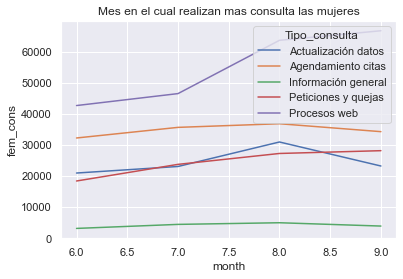

In [19]:
sns.set(style='darkgrid')

# Calculando las mujeres por consulta
hist_Us['fem_cons'] = hist_Us['Genero'] == 'Femenino'
femenino_consulta = hist_Us.groupby(['month','Tipo_consulta'], as_index=False )['fem_cons'].sum()

print(femenino_consulta.head())
# Trazando las consultas por mes
ax = sns.lineplot(data=femenino_consulta, x='month', y='fem_cons', hue = 'Tipo_consulta')

ax.set_title('Mes en el cual realizan mas consulta las mujeres')
#ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

# El cual mes realizan mas consulta las mujeres

In [20]:
hist_Us[["Fecha_consulta"]].sort_values("Fecha_consulta",ascending=False).tail(n=10)                                                                       

,Fecha_consulta
41375,2015-06-01 11:20:55
230317,2015-06-01 11:19:09
230320,2015-06-01 11:19:09
393758,2015-06-01 11:18:37
495836,2015-06-01 11:16:22
230319,2015-06-01 11:14:08
230322,2015-06-01 11:14:08
41376,2015-06-01 11:13:42
41378,2015-06-01 11:13:42
162338,2015-06-01 11:10:04


Se evidencia que el análisis se realiza solo para el año 2015

In [21]:
histMes = hist_Us.groupby('Departamento')['hour'].sum().sort_values().reset_index()
histMes

,Departamento,hour
0,GUAVIARE,12
1,VAUPÉS,30
2,AMAZONAS,89
3,CHOCÓ,92
4,CAQUETÁ,186
...,...,...
61,SANTAFÉ DE BOGOTÁ,436866
62,Cundinamarca,471054
63,Valle del Cauca,620364
64,Antioquia,841281


Text(0.5, 1.0, 'Horas en la linea por departamento')

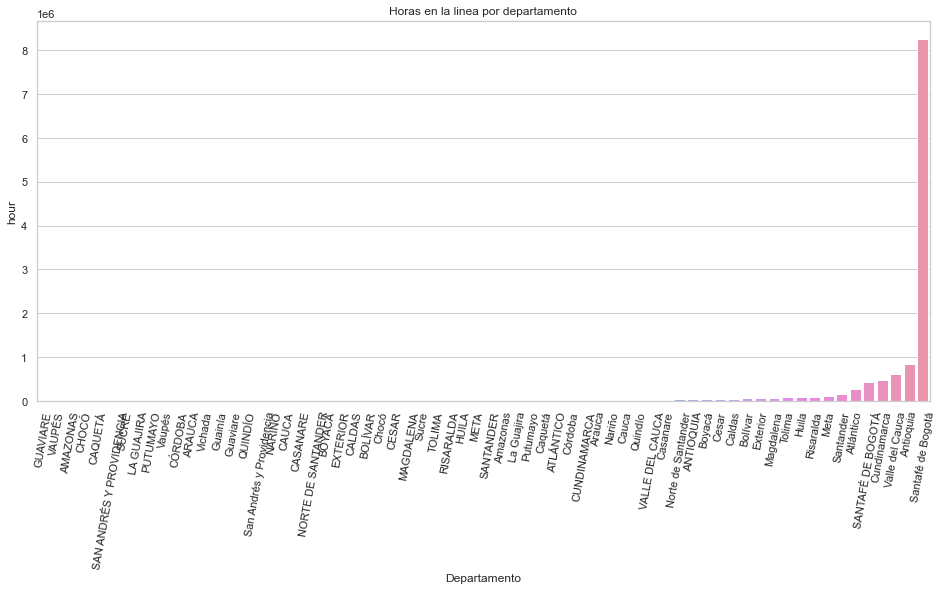

In [61]:
# Configurar el tema de la trama
sns.set(style='whitegrid')

figure,axis = plt.subplots(1 ,figsize=(16,7))
sns.barplot(x='Departamento', y='hour', data=histMes,ax=axis)
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Horas en la linea por departamento')

# Cual departamento dedica mas horas en la linea

In [23]:
histGenero = hist_Us.groupby('Genero')['day'].sum().sort_values().reset_index()
histGenero

,Genero,day
0,Masculino,2392815
1,Femenino,8870521


Text(0.5, 1.0, 'Días en la linea por Genero')

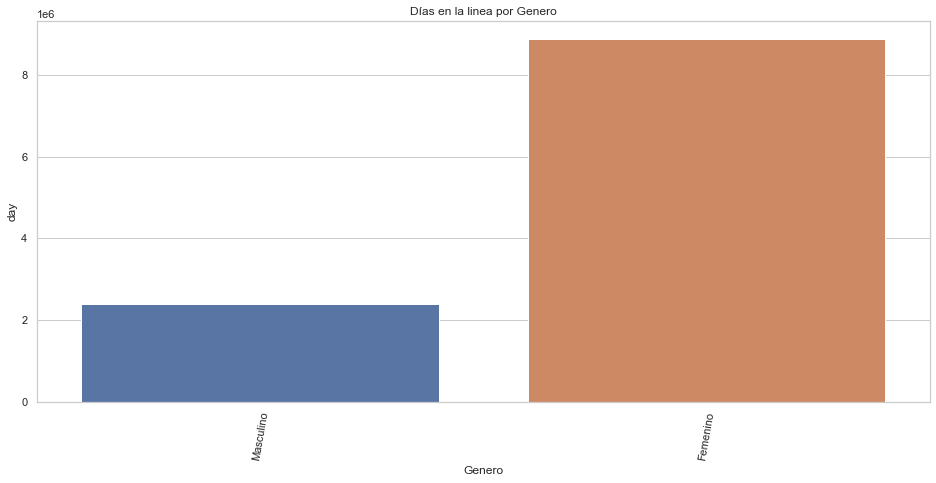

In [62]:
sns.set(style='whitegrid')

figure,axis = plt.subplots(1 ,figsize=(16,7))
sns.barplot(x='Genero', y='day', data=histGenero,ax=axis)
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Días en la linea por Genero')

# Cual genero dedica mas tiempo en la linea, en días

### Transformacion de los datos
#### La mayoria de los datos debe ser numerico para procesarlos, se convertiran los datos categoricos a numericos

In [25]:
# De que tipo son las variables, # determinar el tipo de cada uno de los datos
hist_Us.dtypes

ID_Cuenta                 object
Tipo_persona              object
Departamento              object
Genero                    object
Fecha_consulta    datetime64[ns]
Tipo_consulta             object
year                       int64
month                      int64
day                        int64
hour                       int64
minute                     int64
second                     int64
fem_cons                    bool
dtype: object

In [26]:
# verificar cuantos datos hay de tipo numerico y cuantos tipo object
hist_Us.dtypes.value_counts()

int64             6
object            5
datetime64[ns]    1
bool              1
dtype: int64

In [27]:
hist2 = hist_Us.loc[:, ['Tipo_persona', 'Tipo_consulta', 'Genero','Departamento', "year","month","day","hour","minute","second"]]
hist2

,Tipo_persona,Tipo_consulta,Genero,Departamento,year,month,day,hour,minute,second
0,soltero,Actualización datos,Femenino,Santafé de Bogotá,2015,6,22,16,14,35
1,soltero,Agendamiento citas,Femenino,Santafé de Bogotá,2015,6,22,16,37,2
2,soltero,Agendamiento citas,Femenino,Santafé de Bogotá,2015,6,22,15,50,56
3,soltero,Agendamiento citas,Masculino,Santafé de Bogotá,2015,9,9,14,35,37
4,soltero,Agendamiento citas,Femenino,Santafé de Bogotá,2015,7,24,20,36,26
...,...,...,...,...,...,...,...,...,...,...
722389,soltero,Agendamiento citas,Femenino,Santafé de Bogotá,2015,6,23,18,9,45
722390,soltero,Actualización datos,Femenino,Santafé de Bogotá,2015,6,23,19,35,4
722391,NaN,Agendamiento citas,Femenino,Santafé de Bogotá,2015,8,19,21,28,34
722392,soltero,Información general,Femenino,Exterior,2015,6,30,13,5,21


In [28]:
# Reemplazar caracter especial / por vacio, Es el caso para Tipo_persona: /casado
hist2=hist2.replace('\/','',regex=True)
hist2.head()

,Tipo_persona,Tipo_consulta,Genero,Departamento,year,month,day,hour,minute,second
0,soltero,Actualización datos,Femenino,Santafé de Bogotá,2015,6,22,16,14,35
1,soltero,Agendamiento citas,Femenino,Santafé de Bogotá,2015,6,22,16,37,2
2,soltero,Agendamiento citas,Femenino,Santafé de Bogotá,2015,6,22,15,50,56
3,soltero,Agendamiento citas,Masculino,Santafé de Bogotá,2015,9,9,14,35,37
4,soltero,Agendamiento citas,Femenino,Santafé de Bogotá,2015,7,24,20,36,26


In [29]:
# Se limpian datos en variable tipo de persona: donde soltero sea = 1, casado = 0 y unión libre = 2, no sabe = 3
#tipoP = {'soltero':1, 'casado':0, 'unión libre':2, 'no sabe':3}
# función para convertir a binario enviando como parametro x, donde x sea igual a soltero, retorna 0, sino si es casado 1, 
# sino si es unión libre 2, de lo contrario retorna 3

def convert_to_numeric(x):
    if (x == "soltero"):
        return 0;
    else:
        if (x == "casado"):
            return 1;
        else:
            if (x == "unión libre"):
                return 2;
            else:
                return 3;
    
    
hist2['Tipo_persona'] = hist2['Tipo_persona'].apply(convert_to_numeric)
hist2.tail(10)

,Tipo_persona,Tipo_consulta,Genero,Departamento,year,month,day,hour,minute,second
722384,0,Agendamiento citas,Femenino,Santafé de Bogotá,2015,7,3,15,32,47
722385,0,Agendamiento citas,Femenino,Santafé de Bogotá,2015,8,4,0,5,50
722386,3,Procesos web,Femenino,Santafé de Bogotá,2015,6,11,13,36,35
722387,0,Agendamiento citas,Femenino,Santafé de Bogotá,2015,6,17,16,54,54
722388,0,Peticiones y quejas,Femenino,Santafé de Bogotá,2015,6,2,15,59,34
722389,0,Agendamiento citas,Femenino,Santafé de Bogotá,2015,6,23,18,9,45
722390,0,Actualización datos,Femenino,Santafé de Bogotá,2015,6,23,19,35,4
722391,3,Agendamiento citas,Femenino,Santafé de Bogotá,2015,8,19,21,28,34
722392,0,Información general,Femenino,Exterior,2015,6,30,13,5,21
722393,0,Agendamiento citas,Femenino,Santafé de Bogotá,2015,9,25,14,42,42


In [30]:
tipoC = {'Actualización datos':0, 'Agendamiento citas':1, 'Información general':2, 'Peticiones y quejas': 3, 'Procesos web': 4}

In [31]:
hist2['Tipo_consulta'] = hist2['Tipo_consulta'].map(tipoC)

In [32]:
hist2.head()

,Tipo_persona,Tipo_consulta,Genero,Departamento,year,month,day,hour,minute,second
0,0,0,Femenino,Santafé de Bogotá,2015,6,22,16,14,35
1,0,1,Femenino,Santafé de Bogotá,2015,6,22,16,37,2
2,0,1,Femenino,Santafé de Bogotá,2015,6,22,15,50,56
3,0,1,Masculino,Santafé de Bogotá,2015,9,9,14,35,37
4,0,1,Femenino,Santafé de Bogotá,2015,7,24,20,36,26


In [33]:
consulta_pers = hist2.loc[(hist2.Tipo_consulta==4) & (hist2.Tipo_persona==0)]
consulta_pers

,Tipo_persona,Tipo_consulta,Genero,Departamento,year,month,day,hour,minute,second
7,0,4,Femenino,Santafé de Bogotá,2015,7,27,23,6,23
10,0,4,Femenino,Santafé de Bogotá,2015,7,8,14,23,46
11,0,4,Femenino,Santafé de Bogotá,2015,8,12,15,3,31
13,0,4,Femenino,Santafé de Bogotá,2015,9,4,14,37,17
14,0,4,Femenino,Santafé de Bogotá,2015,7,14,21,48,41
...,...,...,...,...,...,...,...,...,...,...
722344,0,4,Femenino,Santafé de Bogotá,2015,8,20,15,15,44
722348,0,4,Femenino,Valle del Cauca,2015,7,16,20,58,11
722352,0,4,Femenino,Santafé de Bogotá,2015,7,1,19,44,40
722355,0,4,Femenino,Quindío,2015,8,10,14,12,40


Text(0, 0.5, 'Tipo_persona')

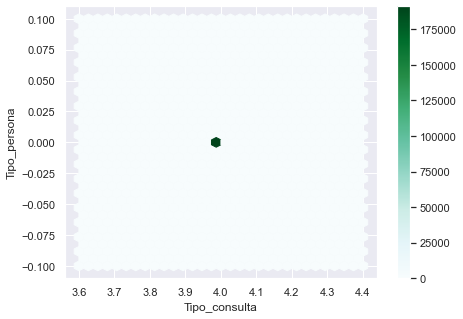

In [34]:
ax = consulta_pers.plot.hexbin(x="Tipo_consulta",y="Tipo_persona",gridsize=30,figsize=(7,5),sharex=False)

ax.set_xlabel("Tipo_consulta")
ax.set_ylabel("Tipo_persona")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Daily % of carrier delayed flights')

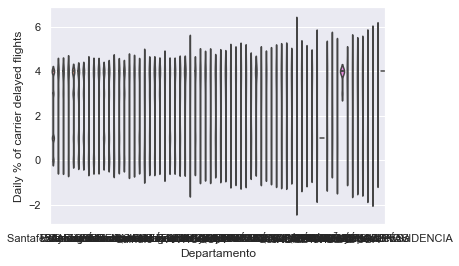

In [38]:
ax = sns.violinplot(hist2.Departamento,hist2.Tipo_consulta,inner="quartile",figsize=(100,100), rotation= 80)

ax.set_ylabel("Daily % of carrier delayed flights")

In [39]:
# Hacemos un analisis de Percentiles
hist2['Departamento'].describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).T

count                722394
unique                   66
top       Santafé de Bogotá
freq                 489037
Name: Departamento, dtype: object

In [40]:
Gpc = hist2.loc[:, ['Genero', 'Tipo_persona','Tipo_consulta', 'month', 'day']]
Gpc

,Genero,Tipo_persona,Tipo_consulta,month,day
0,Femenino,0,0,6,22
1,Femenino,0,1,6,22
2,Femenino,0,1,6,22
3,Masculino,0,1,9,9
4,Femenino,0,1,7,24
...,...,...,...,...,...
722389,Femenino,0,1,6,23
722390,Femenino,0,0,6,23
722391,Femenino,3,1,8,19
722392,Femenino,0,2,6,30


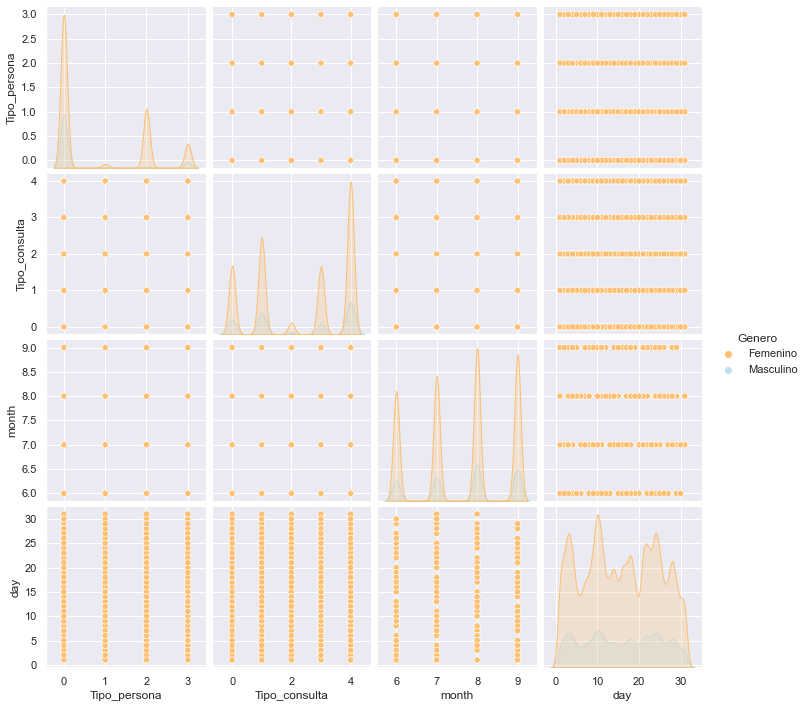

In [41]:
sns.pairplot(data=Gpc, hue='Genero', palette='RdYlBu')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


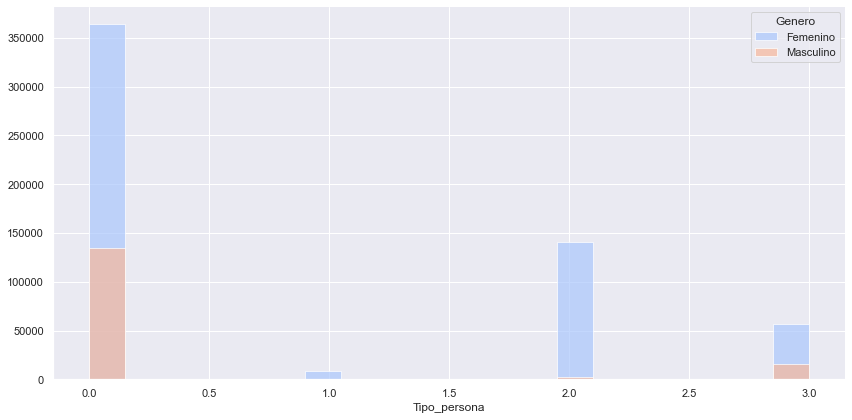

In [42]:
g= sns.FacetGrid(Gpc,hue='Genero',palette='coolwarm',size=6,aspect=2,legend_out=False)
g= g.map(plt.hist,'Tipo_persona',bins=20,alpha=0.7)
g.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


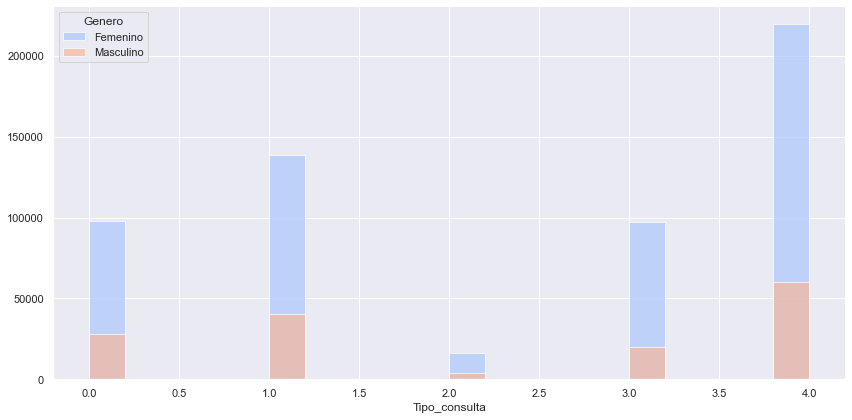

In [43]:
g= sns.FacetGrid(Gpc,hue='Genero',palette='coolwarm',size=6,aspect=2,legend_out=False)
g= g.map(plt.hist,'Tipo_consulta',bins=20,alpha=0.7)
g.add_legend()

In [44]:
hist2['month'] = hist2['month'].astype(int, errors = 'raise')
hist2['day'] = hist2['day'].astype(int, errors = 'raise')

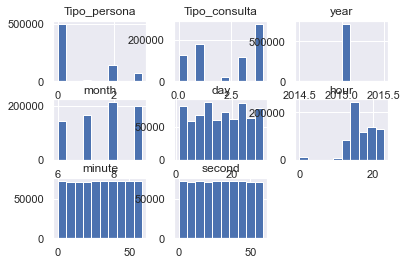

In [45]:
hist2.hist()
plt.show()

In [46]:
#agrupo por tipo de persona: estado civil y por tipo de consulta, sumo, ordeno ascendentemente y doy un index
TipoC = hist2.groupby('Departamento')['Tipo_persona'].count().sort_values().reset_index()
TipoC

,Departamento,Tipo_persona
0,GUAVIARE,1
1,VAUPÉS,3
2,AMAZONAS,5
3,CHOCÓ,6
4,CAQUETÁ,10
...,...,...
61,SANTAFÉ DE BOGOTÁ,25765
62,Cundinamarca,27963
63,Valle del Cauca,36780
64,Antioquia,49991


In [47]:
#TipoC.value_counts()
# siempre representar por porcentajes. 36097/total

In [48]:
#agrupo por departamento y por tipo de consulta, sumo, ordeno ascendentemente y doy un index
TipoD = hist2.groupby('Departamento')['Tipo_consulta'].count().sort_values().reset_index()
TipoD

,Departamento,Tipo_consulta
0,GUAVIARE,1
1,VAUPÉS,3
2,AMAZONAS,5
3,CHOCÓ,6
4,CAQUETÁ,10
...,...,...
61,SANTAFÉ DE BOGOTÁ,25765
62,Cundinamarca,27963
63,Valle del Cauca,36780
64,Antioquia,49991


In [49]:
TipoD.value_counts()

Departamento  Tipo_consulta
AMAZONAS      5                1
RISARALDA     310              1
LA GUAJIRA    18               1
La Guajira    478              1
MAGDALENA     201              1
                              ..
Córdoba       887              1
EXTERIOR      124              1
Exterior      3895             1
GUAVIARE      1                1
Vichada       46               1
Length: 66, dtype: int64

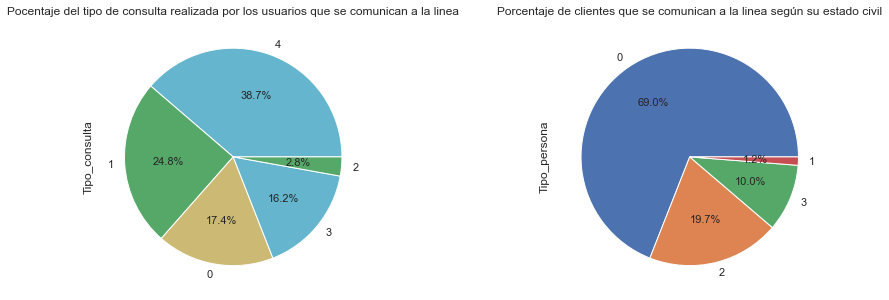

In [50]:
figure,axis = plt.subplots(1,2,figsize=(15,5))
hist2.Tipo_consulta.value_counts().plot.pie(autopct='%1.1f%%',shadow=False, \
                                ax=axis[0], legend = False, fontsize=11, \
                                colors = ['c', 'g','y'])
axis[0].set_title('Pocentaje del tipo de consulta realizada por los usuarios que se comunican a la linea')
hist2.Tipo_persona.value_counts().plot.pie(autopct='%1.1f%%',shadow=False, \
                                ax=axis[1], legend = False, fontsize=11)
axis[1].set_title('Porcentaje de clientes que se comunican a la linea según su estado civil')
plt.show()

In [51]:
hist2.head()

,Tipo_persona,Tipo_consulta,Genero,Departamento,year,month,day,hour,minute,second
0,0,0,Femenino,Santafé de Bogotá,2015,6,22,16,14,35
1,0,1,Femenino,Santafé de Bogotá,2015,6,22,16,37,2
2,0,1,Femenino,Santafé de Bogotá,2015,6,22,15,50,56
3,0,1,Masculino,Santafé de Bogotá,2015,9,9,14,35,37
4,0,1,Femenino,Santafé de Bogotá,2015,7,24,20,36,26


Text(0.5, 1.0, 'Departamento según su estado civil')

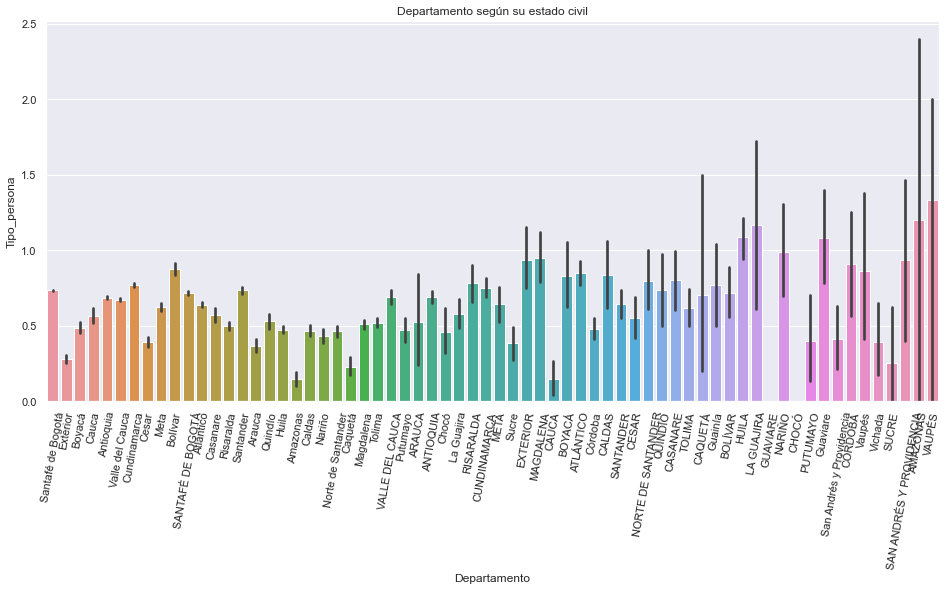

In [52]:
figure,axis = plt.subplots(1 ,figsize=(16,7))
sns.barplot(x='Departamento', y='Tipo_persona', data=hist2,ax=axis)
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Departamento según su estado civil')

Text(0.5, 1.0, 'Correlación entre Tipo de consulta y Tipo de persona, mes, día')

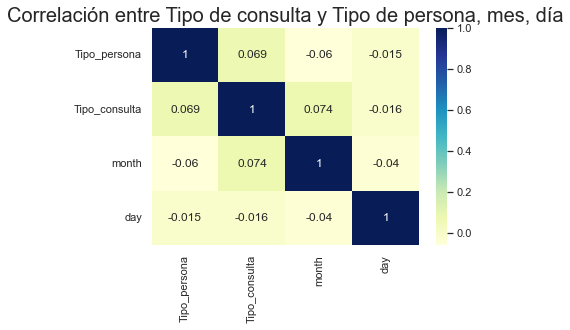

In [53]:
# Análisis de correlación
sns.heatmap(Gpc.corr(),cmap='YlGnBu',annot=True)
plt.title('Correlación entre Tipo de consulta y Tipo de persona, mes, día', fontsize = 20)

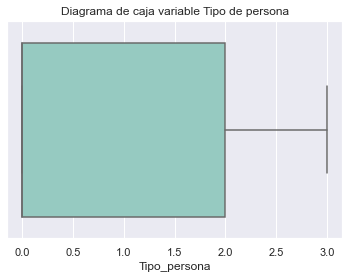

In [54]:
ax = sns.boxplot(x="Tipo_persona",data=hist2, palette="Set3").set_title('Diagrama de caja variable Tipo de persona')

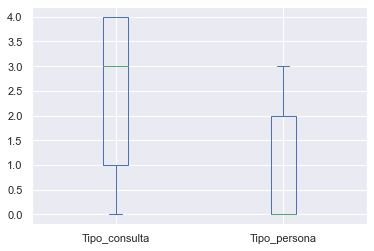

In [55]:
hist2[['Tipo_consulta','Tipo_persona']].plot(kind= 'box')
plt.show()

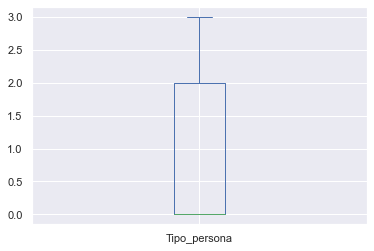

In [56]:
hist2[['Tipo_persona']].plot(kind= 'box')
plt.show()

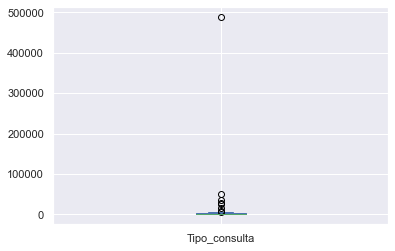

In [57]:
TipoD[['Departamento','Tipo_consulta']].plot(kind= 'box')
plt.show()

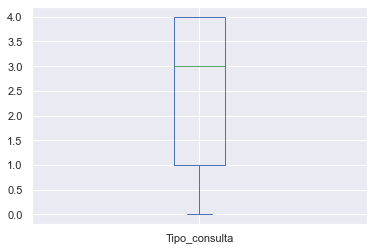

In [58]:
hist2[['Tipo_consulta']].plot(kind= 'box')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución variable Tipo de persona(Estado civil)')

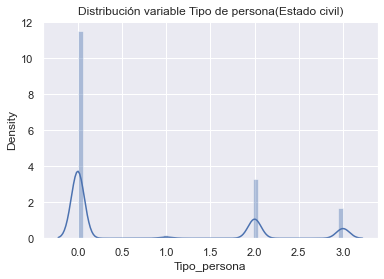

In [59]:
sns.distplot(hist2['Tipo_persona']).set_title('Distribución variable Tipo de persona(Estado civil)')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución variable Tipo de consulta')

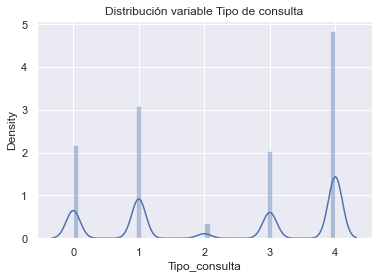

In [60]:
sns.distplot(hist2['Tipo_consulta']).set_title('Distribución variable Tipo de consulta')
